# scikit-learn을 활용한 분류모델 실습
scikit-learn 주소
https://scikit-learn.org/stable/datasets/toy_dataset.html

1)load_digits
2)load_wine
3)load_breast_cancer

# (1)load_digits: 손글씨를 분류해 봅시다

"0-9까지의 손글씨를 예측해보자"

Preprocessing programs made available by NIST were used to extract normalized bitmaps of handwritten digits from a preprinted form. From a total of 43 people, 30 contributed to the training set and different 13 to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions.

1.필요한 모듈 import하기

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

2.데이터 준비 load_digits 메서드를 사용합니다.

In [3]:
digits= load_digits()

3.데이터 이해하기

In [4]:
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [5]:
import pandas as pd
digits_data = digits.data
digits_label = digits.target

digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df["label"] = digits.target #라벨 출력 #0-9
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


4.train, test 데이터 분리

모델 학습과 테스트용 문제지와 정답지를 준비해 봅시다. X_train, X_test, y_train, y_test를 생성하는 방법을 참고해 보세요.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)
#테스트 데이터_20%
#random_state= 랜덤으로 분리

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
print('y_train 개수: ', len(y_train),', y_test 개수: ', len(y_test))

X_train 개수:  1437 , X_test 개수:  360
y_train 개수:  1437 , y_test 개수:  360


5.다양한 모델로 학습시켜보기

In [9]:
#의사결정 나무

from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(random_state=32)

decision_tree.fit(X_train, y_train) #fit = training에 맞게 fitting
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [68]:
#랜덤 포레스트

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



In [69]:
#SVM

from sklearn import svm
svm_model = svm.SVC()
print(svm_model._estimator_type)
svm_model.fit(X_train, y_train)
y_pred=svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [70]:
#SGDClassifier

from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
print(sgd_model._estimator_type)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.92      0.79      0.85        42
           2       0.95      1.00      0.98        40
           3       0.86      0.94      0.90        34
           4       0.97      0.97      0.97        37
           5       0.93      1.00      0.97        28
           6       0.96      0.96      0.96        28
           7       0.97      0.97      0.97        33
           8       0.86      0.88      0.87        43
           9       0.97      0.91      0.94        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



In [71]:
#Logistic Regreession

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
print(logistic_model._estimator_type)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정리

1.의사결정나무 2.랜덤포레스트 3.SVM 4.SGDClassifier 5.로지스틱회귀분석

(0.86 0.96 0.99 0.94 0.95)

>SVM > 랜덤포레스트 > 로지스틱회귀분석 >SGDClassifier >의사결정나무

6.모델을 평가해보기

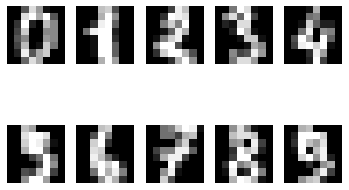

In [73]:
#모델의 성능을 평가하는 데에는 정확도뿐만 아니라 다른 척도들이 존재

import matplotlib.pyplot as plt
%matplotlib inline

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [74]:
digits_data[0]
#손글씨 데이터를 나열하면 64개의 숫자들이 축력된다
#이는 (8*8) 크기의 이미지를 64개의 숫자들로 배열된 것 

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [111]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

오차행렬 이용해서 평가해보기

In [10]:
#SVM #오차행렬

from sklearn import svm
from sklearn.metrics import confusion_matrix

svm_model = svm.SVC()
print(svm_model._estimator_type)
svm_model.fit(X_train, y_train)
y_pred=svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  0],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 31]])

가장 정확도가 높았던 SVM모델을 평가해보았다.
오차행렬을 살펴보면,

1, 5, 8, 9를 뺀 나머지 숫자는 예측 정확도가 1로 아주 높은 수치를 보였다.

리콜: 실제로 정답이 true인 것들 중에서 분류기가 True로 예측한 비율이다.
그래서, 오차행렬을 보면 알다싶이
8과 9는 (1 또는 5)로 인식을 했다는 것을 알수 있다.


# (2) load_wine : 와인을 분류해 봅시다

The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

1.필요한 모듈 import하기

In [4]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

2.데이터 준비

In [5]:
wine= load_wine()

3.데이터 이해하기

In [6]:
print(dir(wine))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [7]:
import pandas as pd
wine_data = wine.data
wine_label = wine.target

wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df["label"] = wine.target #라벨 출력 # 0 1 2
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


4.train, test 데이터 분리

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=7)
#테스트 데이터_20%
#random_state= 랜덤으로 분리

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))

X_train 개수:  142 , X_test 개수:  36


5.다양한 모델로 학습시켜보기

In [17]:
#의사결정 나무

from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train) #fit = training에 맞게 fitting
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



In [18]:
#랜덤 포레스트

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [11]:
#SVM

from sklearn import svm
svm_model = svm.SVC()
print(svm_model._estimator_type)
svm_model.fit(X_train, y_train)
y_pred=svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



In [12]:
#SGDClaaifier

from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
print(sgd_model._estimator_type)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.50      1.00      0.67        17
           2       0.00      0.00      0.00        12

    accuracy                           0.53        36
   macro avg       0.50      0.43      0.37        36
weighted avg       0.43      0.53      0.40        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
#Logistic Regreession

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
print(logistic_model._estimator_type)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정리

1.의사결정나무 2.랜덤포레스트 3.SVM 4.SGDClassifier 5.로지스틱회귀분석

(0.94 1 0.61 0.61 0.97)

>랜덤포레스트 > 로지스틱회귀분석 > 의사결정나무 > SVM = SGDClassifier

6.모델을 평가해보기

랜덤 포레스트는 정확히 분류한 것을 알 수 있다.
이번에는 반대로 가장 낮게 나온 SVM과 SGD을 살펴보기로 했다.

In [10]:
#SVM
from sklearn.metrics import confusion_matrix
from sklearn import svm
svm_model = svm.SVC()
print(svm_model._estimator_type)
svm_model.fit(X_train, y_train)
y_pred=svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

classifier
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



array([[ 6,  0,  1],
       [ 1, 15,  1],
       [ 0, 11,  1]])

1. SVM

0 1 2의 분류네임 중
2를 1로 인식것이 많다.
(12개 중 11)

In [24]:
#SGDClaaifier

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
print(sgd_model._estimator_type)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

classifier
              precision    recall  f1-score   support

           0       0.35      1.00      0.52         7
           1       0.75      0.71      0.73        17
           2       0.00      0.00      0.00        12

    accuracy                           0.53        36
   macro avg       0.37      0.57      0.42        36
weighted avg       0.42      0.53      0.44        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 7,  0,  0],
       [ 5, 12,  0],
       [ 8,  4,  0]])

2. SGD

SGD는 1 2를 0으로 인식한 것이 많다.
또한, 2를 인식한 정확도는 0이다.

# (3) load_breast_cancer : 유방암 여부를 진단해 봅시다

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

암 진단 여부

1.필요한 모듈 import하기

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

2.데이터 준비

In [26]:
breast_cancer= load_breast_cancer()

3.데이터 이해하기

In [27]:
print(dir(breast_cancer))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [28]:
import pandas as pd
breast_cancer_data = breast_cancer.data
breast_cancer_label = breast_cancer.target

breast_cancer_df = pd.DataFrame(data=breast_cancer_data, columns=breast_cancer.feature_names)
breast_cancer_df["label"] = breast_cancer.target #라벨 출력 #0, 1
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


4.train, test 데이터 분리

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, 
                                                    breast_cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=7)
#테스트 데이터_20%
#random_state= 랜덤으로 분리

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
print('y_train 개수: ', len(y_train),', y_test 개수: ', len(y_test))

X_train 개수:  455 , X_test 개수:  114
y_train 개수:  455 , y_test 개수:  114


5.다양한 모델로 학습시켜보기

In [30]:
#의사결정 나무

from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train) #fit = training에 맞게 fitting
y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



In [31]:
#랜덤 포레스트

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [32]:
#SVM

from sklearn import svm
svm_model = svm.SVC()
print(svm_model._estimator_type)
svm_model.fit(X_train, y_train)
y_pred=svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



In [33]:
#SGDClaaifier

from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
print(sgd_model._estimator_type)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       0.80      0.88      0.83        40
           1       0.93      0.88      0.90        74

    accuracy                           0.88       114
   macro avg       0.86      0.88      0.87       114
weighted avg       0.88      0.88      0.88       114



In [34]:
#Logistic Regreession

from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
print(logistic_model._estimator_type)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정리

1.의사결정나무 2.랜덤포레스트 3.SVM 4.SGDClassifier 5.로지스틱회귀분석

(0.91 1 0.9 0.88 0.95)

>랜덤포레스트 > 로지스틱회귀분석 > 의사결정나무 > SVM > SGDClassifier

6.모델을 평가해보기

In [36]:
#SGDClaaifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
print(sgd_model._estimator_type)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

classifier
              precision    recall  f1-score   support

           0       0.87      0.82      0.85        40
           1       0.91      0.93      0.92        74

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.88       114
weighted avg       0.89      0.89      0.89       114



array([[33,  7],
       [ 5, 69]])

의료 진단은 환자의 생명을 좌지우지하는 중요한 판단의 척도가 된다.
그러므로 진단의 정확도보다는 악성종양판단을 얼마나 잘 하는가가 중요하다.
모든 모델을 보면 정확도가 높게 나오지만 Recall 값을 보면
악성종양환자에게 양성종양이라는 잘못된 판단을 한 것을 알 수 있다.

해당 데이터는 정확도보다, Recall 값이 중요한 예제이다.
따라서 모든 모델들의 Recall 값을 확인하는 것이 중요하다.
7명의 악성 종양 환자에게 양성 종양이라는 잘못된 판단
5명의 양성 종양 환자에게 악성 종양이라는 잘못된 판단


따라서 Random Forest를 제외한 나머지 4개의 모델은 해당 데이터에 적합한 모델이 아니라고 판단

# 회고

사이킷런의 분류모델을 실습하면서
모든 프로젝트에서 정확도가 높게나온 것은 랜덤 포레스트였다.
데이터의 정확도가 높은 것이 중요한 판단이 되지만, 앞의 암환자 진단 모델에서처럼 환자에게 잘못된 진단을 한다면 치명적인 문제가 된다.
그래서 분류모델을 실행할 때 어떤 모델이 적합한지 잘 판단해야하므로, 정확도에 의존해선 안된다.